Ejemplo del libro Pag 87 MNIST

Enlaces de referencias externos

[Blog](https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning)

[Blog2](https://www.edureka.co/blog/classification-in-machine-learning/)

In [49]:
from sklearn.datasets import fetch_openml
import numpy as np

In [35]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [36]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [37]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [38]:
X, y = mnist["data"], mnist["target"]

In [39]:
X.shape

(70000, 784)

In [40]:
y.shape

(70000,)

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

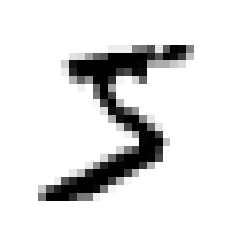

In [46]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [47]:
y[0]

'5'

In [50]:
y = y.astype(np.uint8)

Separo el training set y el test set.

Por defecto ya viene shuffled asi que tomo los primeros 60000 registros como test set y los 10000 restantes como test set

In [53]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Clasificacion Binaria

Clasificaremos si la imagen es 5 o no es 5

In [58]:
y_train_5 = (y_train==5)

In [62]:
y_test_5 = (y_test==5)

Los labels ahora sera True si la imagen es un 5 o False si la imagen no es 5.

Notar que hay 1/10 de probabilidad de que sea 5 (numeros del 0 al 9), por lo que se espera que hayan muchos False

In [63]:
# Usamos SDGClassifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [65]:
sgd_clf.predict([some_digit])

array([ True])

## Evaluamos SDGClassifier

Utilizaremos primero cross_val_score.

No es el mejor de todos porque 

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Confusion Matrix

The general idea is to count the number of times instances of class A are classified as class B.

Each row in a confusion matrix represents an actual class, while each column represents a predicted class

In [67]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [68]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
tive class): 53,057 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,325 were wrongly
classified as non-5s (false negatives), while the remaining 4,096 were correctly classi‐
fied as 5s (true positives).

Un modelo perfecto seria de la forma

In [71]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [73]:
# Calculamos el score de precision y de recall

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [74]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [75]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# Evaluando RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [77]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [78]:
y_probas_forest[0]

array([0.11, 0.89])

In [81]:
y_train_5[0]

True

In [83]:
from sklearn.metrics import roc_curve

# Me quedo unicamente con las probabilidades de que sea True
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

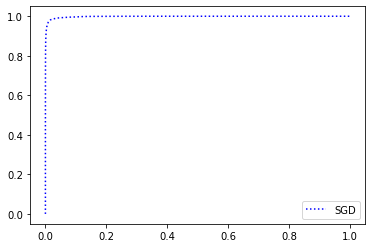

In [86]:
plt.plot(fpr_forest, tpr_forest, "b:", label="SGD")

plt.legend(loc="lower right")
plt.show()

# Multiclass Classification

One way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
(also called one-versus-the-rest)

In [87]:
'''
Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐class classification 
task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO)
'''

sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [94]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [91]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [89]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [101]:
## Cross validation

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Para mejorar un poco el cross_val_score, hacemos un scalling

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy' )

array([0.8983, 0.891 , 0.9018])

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the **OneVsOneClassifier** or **OneVsRestClassifier** classes. Simply create an instance
and pass a binary classifier to its constructor.

In [95]:
'''
For example, this code creates a multi‐
class classifier using the OvO strategy, based on a SGDClassifier
'''

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [96]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [97]:
len(ovo_clf.estimators_)

45

## Pruebo ahora con Random Forest

Random Forest classifiers can directly classify instances into multiple classes.

In [98]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [100]:
# You can call predict_proba() to get the list of probabilities that the classifier assigned to each
# instance for each class

forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

# Error Analisis

In [103]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [104]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [105]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

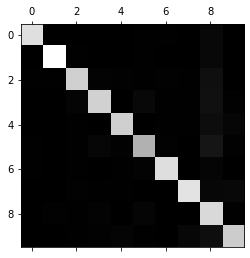

In [106]:
# Lo veo las limpio
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [107]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [109]:
norm_conf_mx = conf_mx / row_sums

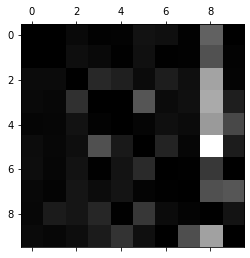

In [111]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel classification

In [115]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [120]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [121]:
knn_clf.predict([some_digit])

array([[False,  True]])